In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix
)
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('CitarumWater.csv')
df.dropna(inplace=True)
df

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.570000,25.55°C,11.000000,6.110000,3.300000,6.100000,1.080000,17000.000000,0.043000,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.690000,25.55°C,13.000000,6.200000,5.310000,12.500000,1.850000,28000.000000,0.011000,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.390000,25.55°C,15.000000,3.610000,7.400000,23.500000,1.250000,90000.000000,0.230000,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.490000,25.55°C,17.000000,3.170000,8.130000,27.500000,1.210000,300000.000000,0.057000,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.170000,25.55°C,6.000000,6.820000,2.890000,5.440000,1.040000,3000.000000,0.110000,-,2.44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Citarum,Cisanti,11/2/2022,6.030091,25.55°C,21.152867,4.262901,1.741993,22.357555,1.604541,343.607898,0.056633,-,0.77,1
2496,2497,Citarum,Wangisagara,11/3/2022,6.176031,25.55°C,27.077853,3.151708,5.146220,11.099887,2.266671,612.311167,0.071878,-,1.61,2
2497,2498,Citarum,Koyod,11/4/2022,7.776482,25.55°C,22.022523,7.279574,5.865096,28.140202,2.103214,533.277383,0.044954,-,1.80,2
2498,2499,Citarum,Setelah IPAL Cisirung,11/5/2022,7.047090,25.55°C,32.364635,1.485632,4.624189,29.394513,1.748222,425.598926,0.096612,-,1.46,2


In [14]:
df.dtypes

No                 int64
NamaSungai        object
TitikPantau       object
Waktu             object
pH               float64
Temp              object
TSS              float64
DO               float64
BOD              float64
COD              float64
Nitrat           float64
FecalColiform    float64
Fosfat           float64
O2                object
IP               float64
Class              int64
dtype: object

In [16]:
X = df.drop(columns=["Class"])
y = df["Class"].values

categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


y_prob = model.predict_proba(X_test)


y_pred = model.predict(X_test)


y_test_bin = label_binarize(y_test, classes=np.unique(y_test))


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc_score = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc_score:.4f}")


Accuracy: 0.9680
Precision: 0.9680
Recall: 0.9680
F1-Score: 0.9679
AUC: 0.9985


In [21]:
n_classes = len(np.unique(y_test))

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

y_prob = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc_score = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc_score:.4f}")

Accuracy: 0.9680
Precision: 0.9680
Recall: 0.9680
F1-Score: 0.9679
AUC: 0.9985


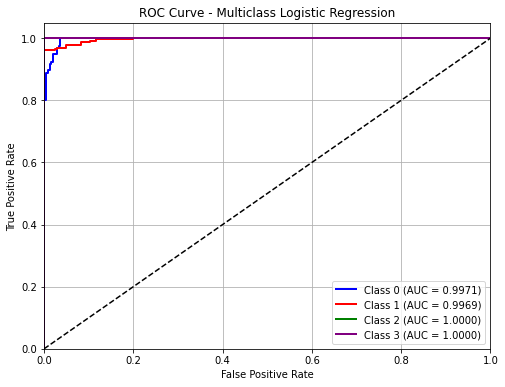

In [22]:
plt.figure(figsize=(8, 6))
colors = cycle(["blue", "red", "green", "purple", "orange"])

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multiclass Logistic Regression")
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Penjelasan

# 1. Accuracy Score

Akurasi adalah ukuran seberapa sering model membuat prediksi yang benar dibandingkan dengan keseluruhan data yang diuji.

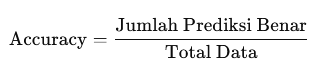

y_test: Label sebenarnya dari data uji.
y_pred: Label yang diprediksi oleh model.


# 2. Precision Score (Presisi)

Presisi mengukur seberapa banyak dari semua prediksi positif yang benar.

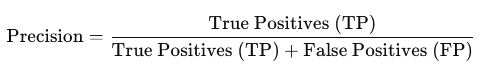

TP (True Positive): Jumlah kasus yang benar-benar positif dan diprediksi positif.
FP (False Positive): Jumlah kasus yang sebenarnya negatif tetapi diprediksi positif.

Jika model mendeteksi 100 kasus positif, dan 80 di antaranya benar sedangkan 20 salah, maka presisinya 80% (0.8).

# 3. Recall Score (Sensitivitas)

Recall mengukur seberapa banyak dari semua kasus positif yang berhasil ditemukan oleh model.

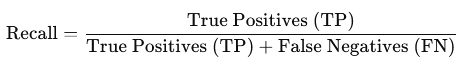

FN (False Negative): Jumlah kasus yang sebenarnya positif tetapi diprediksi negatif.

# 4. F1 Score (Harmonic Mean of Precision and Recall)

F1-score adalah rata-rata harmonik dari presisi dan recall. Ini memberikan keseimbangan antara keduanya.

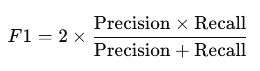

Jika presisi tinggi tetapi recall rendah, atau sebaliknya, F1-score akan lebih rendah.
Jika presisi dan recall seimbang, F1-score akan mendekati nilainya.

# 5. ROC AUC Score (Area Under the ROC Curve)

ROC (Receiver Operating Characteristic) menggambarkan performa model dengan melihat hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR).

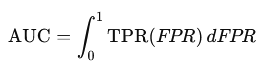

y_test_bin: Label yang sudah diubah menjadi format biner.
y_prob: Probabilitas prediksi model untuk setiap kelas.
multi_class='ovr': One-vs-Rest, yaitu mengukur setiap kelas dibandingkan dengan kelas lainnya.

0.5 → Model sama buruknya dengan tebakan acak.
0.7 - 0.8 → Model cukup baik.
0.8 - 0.9 → Model sangat baik.
0.9 - 1.0 → Model hampir sempurna.